In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import scipy
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic= pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
dataset= titanic.copy()

In [9]:
dataset= dataset.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)

In [10]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


# Preprocessing
|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

In [12]:
dataset.shape

(891, 8)

In [15]:
# Missing value
dataset.isnull().sum()/len(dataset)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [16]:
# Cabin - drop
# Age - imputation
# Embarked - imputation

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


<AxesSubplot:ylabel='Age'>

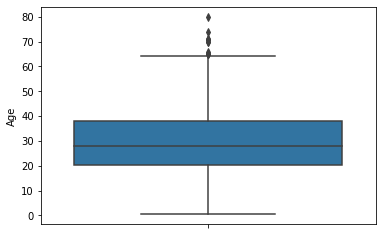

In [18]:
sns.boxplot(y='Age', data= dataset)

In [19]:
dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
dataset['Age']= dataset['Age'].fillna(dataset['Age'].median())

In [22]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
dataset['Embarked']= dataset['Embarked'].fillna('S')

In [24]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Cabin       687
Embarked      0
dtype: int64

In [26]:
dataset= dataset.drop(['Cabin'], axis=1)

In [27]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [29]:
# Encoding
#Pclass, Sex, Embarked
dataset= pd.get_dummies(dataset, columns=['Pclass'])
dataset

,Survived,Sex,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,S,0,0,1
1,1,female,38.0,1,0,C,1,0,0
2,1,female,26.0,0,0,S,0,0,1
3,1,female,35.0,1,0,S,1,0,0
4,0,male,35.0,0,0,S,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,S,0,1,0
887,1,female,19.0,0,0,S,1,0,0
888,0,female,28.0,1,2,S,0,0,1
889,1,male,26.0,0,0,C,1,0,0


In [30]:
dataset= dataset.drop(['Pclass_3'], axis=1)
dataset

,Survived,Sex,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2
0,0,male,22.0,1,0,S,0,0
1,1,female,38.0,1,0,C,1,0
2,1,female,26.0,0,0,S,0,0
3,1,female,35.0,1,0,S,1,0
4,0,male,35.0,0,0,S,0,0
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,S,0,1
887,1,female,19.0,0,0,S,1,0
888,0,female,28.0,1,2,S,0,0
889,1,male,26.0,0,0,C,1,0


In [31]:
dataset= pd.get_dummies(dataset, columns=['Sex'])
dataset

,Survived,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Sex_female,Sex_male
0,0,22.0,1,0,S,0,0,0,1
1,1,38.0,1,0,C,1,0,1,0
2,1,26.0,0,0,S,0,0,1,0
3,1,35.0,1,0,S,1,0,1,0
4,0,35.0,0,0,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,S,0,1,0,1
887,1,19.0,0,0,S,1,0,1,0
888,0,28.0,1,2,S,0,0,1,0
889,1,26.0,0,0,C,1,0,0,1


In [32]:
dataset= dataset.drop(['Sex_male'], axis=1)
dataset

,Survived,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Sex_female
0,0,22.0,1,0,S,0,0,0
1,1,38.0,1,0,C,1,0,1
2,1,26.0,0,0,S,0,0,1
3,1,35.0,1,0,S,1,0,1
4,0,35.0,0,0,S,0,0,0
...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,S,0,1,0
887,1,19.0,0,0,S,1,0,1
888,0,28.0,1,2,S,0,0,1
889,1,26.0,0,0,C,1,0,0


In [33]:
dataset= pd.get_dummies(dataset, columns=['Embarked'])
dataset

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,0,0,0,0,1
1,1,38.0,1,0,1,0,1,1,0,0
2,1,26.0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,1,0,0,1
4,0,35.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0,1,0,0,0,1
887,1,19.0,0,0,1,0,1,0,0,1
888,0,28.0,1,2,0,0,1,0,0,1
889,1,26.0,0,0,1,0,0,1,0,0


In [34]:
dataset= dataset.drop(['Embarked_S'], axis=1)
dataset

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,0,0,0,0,0
1,1,38.0,1,0,1,0,1,1,0
2,1,26.0,0,0,0,0,1,0,0
3,1,35.0,1,0,1,0,1,0,0
4,0,35.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0,1,0,0,0
887,1,19.0,0,0,1,0,1,0,0
888,0,28.0,1,2,0,0,1,0,0
889,1,26.0,0,0,1,0,0,1,0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Pclass_1    891 non-null    uint8  
 5   Pclass_2    891 non-null    uint8  
 6   Sex_female  891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 32.3 KB


In [36]:
dataset['Age'].describe().transpose()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

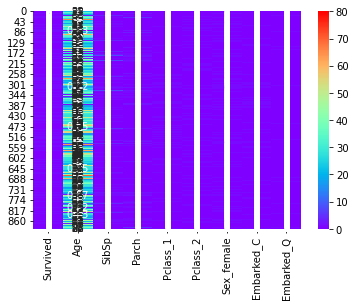

In [37]:
sns.heatmap(dataset, annot=True, cmap='rainbow')

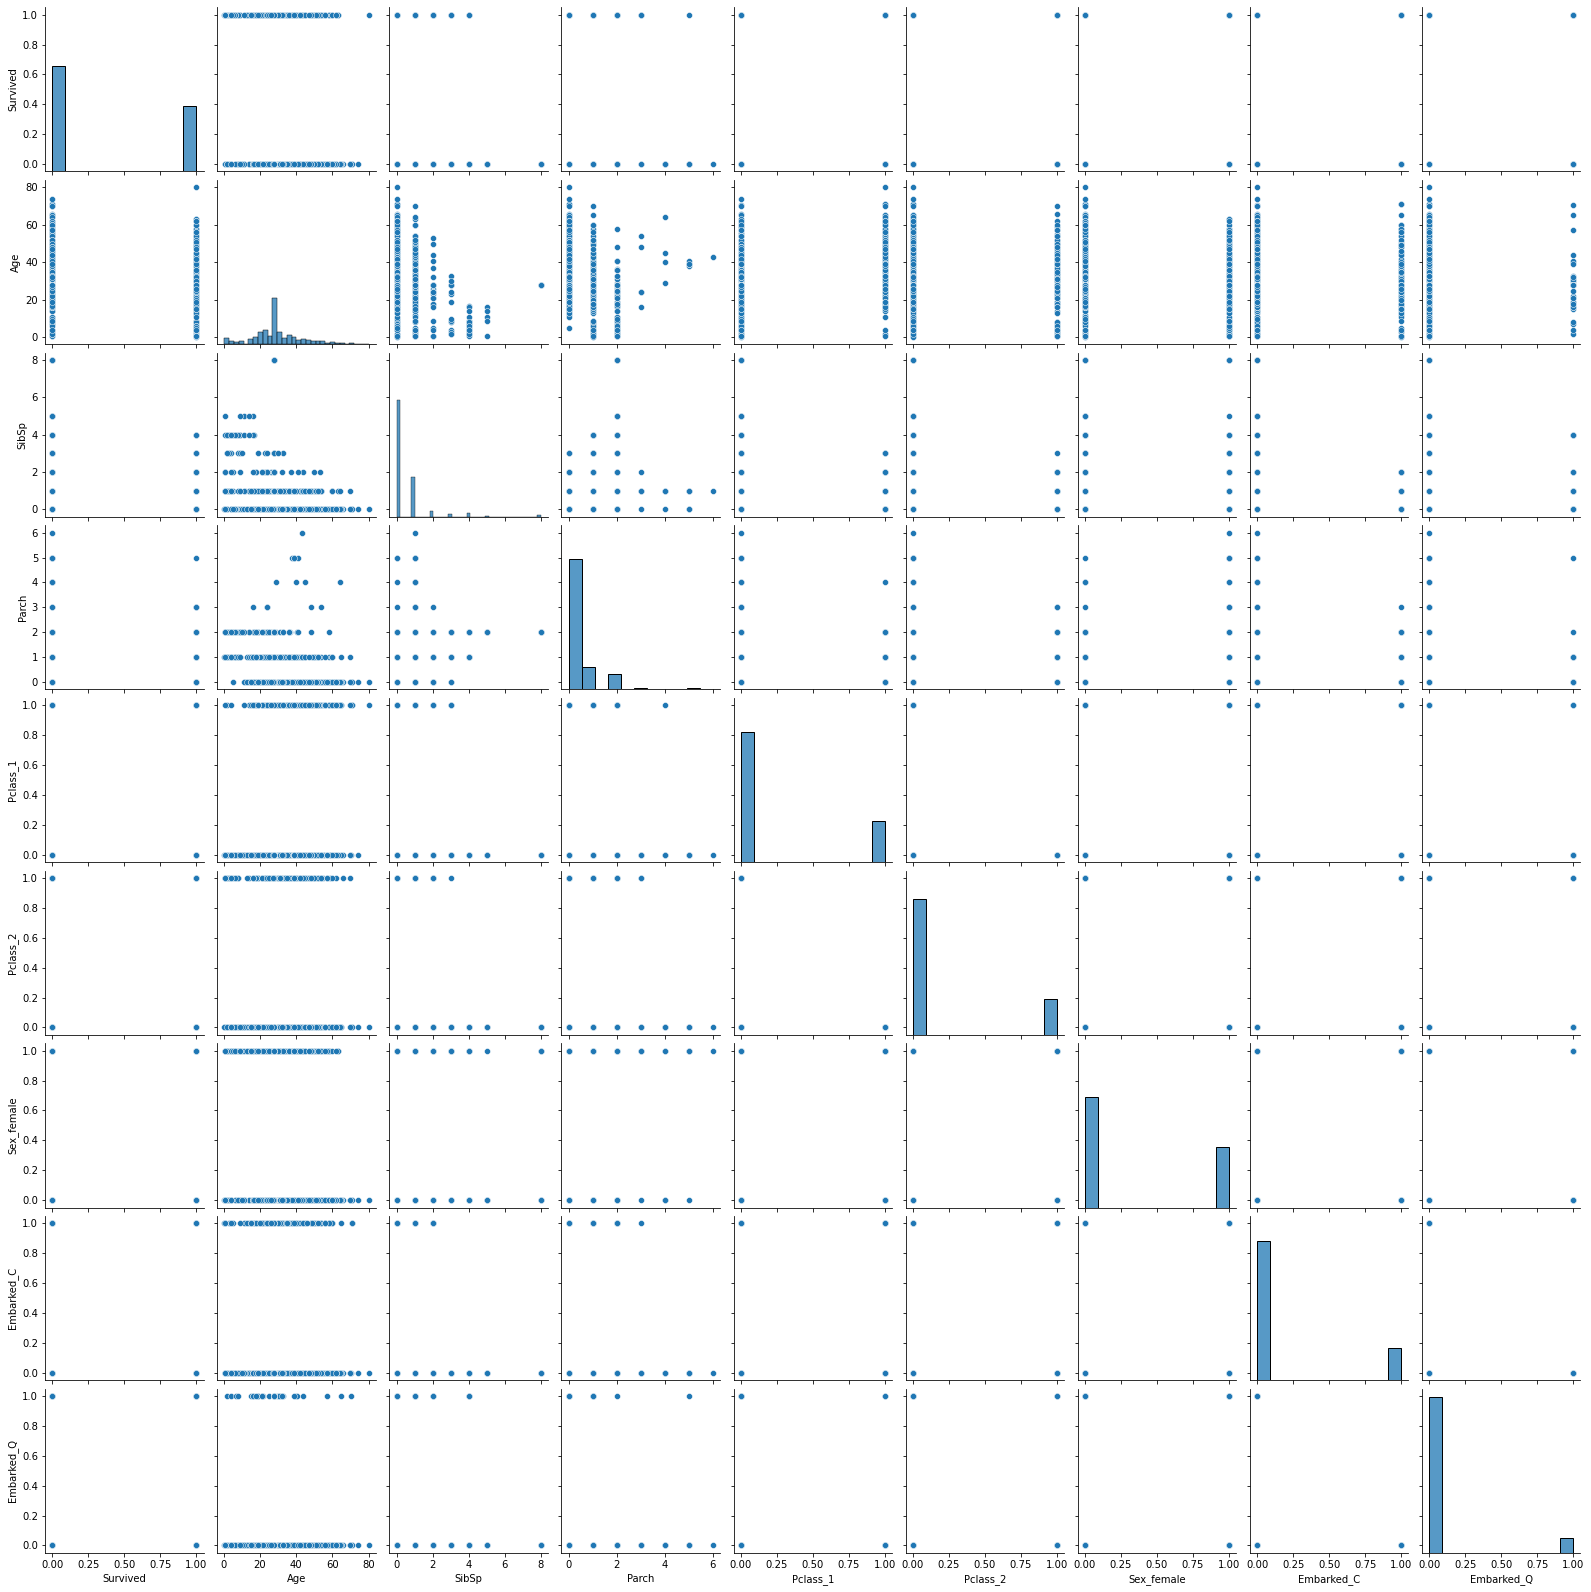

In [38]:
sns.pairplot(dataset)

In [39]:
# Split data in x and y
x= dataset.iloc[:,1:]
y= dataset.iloc[:,0]

In [40]:
x

,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,22.0,1,0,0,0,0,0,0
1,38.0,1,0,1,0,1,1,0
2,26.0,0,0,0,0,1,0,0
3,35.0,1,0,1,0,1,0,0
4,35.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,27.0,0,0,0,1,0,0,0
887,19.0,0,0,1,0,1,0,0
888,28.0,1,2,0,0,1,0,0
889,26.0,0,0,1,0,0,1,0


In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.7, random_state=121)

In [43]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred_train= logit_model.predict(x_train)
y_pred_test= logit_model.predict(x_test)

In [46]:
# Evaluation model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
print(confusion_matrix(y_train, y_pred_train))
print('.....................................')
print(confusion_matrix(y_test, y_pred_test))

[[329  52]
 [ 71 171]]
.....................................
[[141  27]
 [ 28  72]]


In [48]:
print(classification_report(y_train, y_pred_train))
print('.....................................')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       381
           1       0.77      0.71      0.74       242

    accuracy                           0.80       623
   macro avg       0.79      0.79      0.79       623
weighted avg       0.80      0.80      0.80       623

.....................................
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       168
           1       0.73      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [49]:
print(accuracy_score(y_train, y_pred_train))
print('.....................................')
print(accuracy_score(y_test, y_pred_test))

0.8025682182985554
.....................................
0.7947761194029851


## Logistic regression CV

In [63]:
from sklearn.linear_model import LogisticRegressionCV
logit_cv= LogisticRegressionCV(cv=10)

In [64]:
logit_cv.fit(x_train,y_train)

LogisticRegressionCV(cv=10)

In [65]:
y_pred_train_cv= logit_cv.predict(x_train)
y_pred_test_cv= logit_cv.predict(x_test)

In [66]:
print(accuracy_score(y_train, y_pred_train_cv))
print('.....................................')
print(accuracy_score(y_test, y_pred_test_cv))

0.7993579454253612
.....................................
0.7798507462686567


In [57]:
#ROC and AUC
from sklearn.metrics import roc_auc_score
logistic_roc_curve= roc_auc_score(y_test, y_pred_test)
logistic_roc_curve

0.7596428571428572

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, threshhold= roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(threshhold[:10])

array([0.        , 0.16071429, 1.        ])

array([0.  , 0.68, 1.  ])

array([2, 1, 0], dtype=int64)

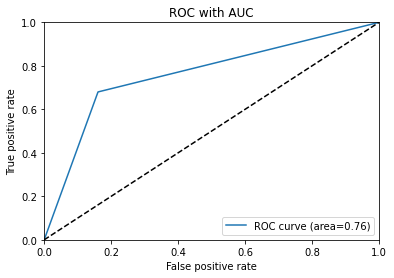

In [62]:
# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label= 'ROC curve (area=%0.2f)' %logistic_roc_curve)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC with AUC')
plt.legend(loc='lower right')
plt.show()

## K-fold Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
accuracy_training= cross_val_score(logit_model,x_train, y_train, cv=15)
accuracy_test= cross_val_score(logit_model,x_test, y_test, cv=15)
print(accuracy_training)
print('...............................................')
print(accuracy_test)

[0.76190476 0.80952381 0.83333333 0.85714286 0.85714286 0.73809524
 0.78571429 0.9047619  0.80487805 0.7804878  0.90243902 0.7804878
 0.70731707 0.7804878  0.73170732]
...............................................
[0.83333333 0.61111111 0.88888889 0.94444444 0.77777778 0.77777778
 0.94444444 0.77777778 0.66666667 0.77777778 0.61111111 0.83333333
 0.83333333 0.88235294 0.88235294]


In [76]:
print(accuracy_training.mean())
print('...............................................')
print(accuracy_test.mean())

0.802361595044522
...............................................
0.8028322440087147


## Classify for x

In [73]:
y_new= logit_model.predict(x)

In [75]:
dataset['Predicted']=y_new
dataset

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q,Price predicted,Predicted
0,0,22.0,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,1,0,1,1,0,1,1
2,1,26.0,0,0,0,0,1,0,0,1,1
3,1,35.0,1,0,1,0,1,0,0,1,1
4,0,35.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0,1,0,0,0,0,0
887,1,19.0,0,0,1,0,1,0,0,1,1
888,0,28.0,1,2,0,0,1,0,0,1,1
889,1,26.0,0,0,1,0,0,1,0,1,1


In [78]:
dataset= dataset.drop(['Price predicted'], axis=1)
dataset

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q,Predicted
0,0,22.0,1,0,0,0,0,0,0,0
1,1,38.0,1,0,1,0,1,1,0,1
2,1,26.0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,1,0,0,1
4,0,35.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0,1,0,0,0,0
887,1,19.0,0,0,1,0,1,0,0,1
888,0,28.0,1,2,0,0,1,0,0,1
889,1,26.0,0,0,1,0,0,1,0,1


## Test CSV Prediction

In [79]:
test_data= pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [82]:
test_data= test_data.drop(['PassengerId','Name','Ticket','Fare'], axis=1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.50,0,0,NaN,Q
1,3,female,47.00,1,0,NaN,S
2,2,male,62.00,0,0,NaN,Q
3,3,male,27.00,0,0,NaN,S
4,3,female,22.00,1,1,NaN,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,NaN,S
414,1,female,39.00,0,0,C105,C
415,3,male,38.50,0,0,NaN,S
416,3,male,NaN,0,0,NaN,S


In [83]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Cabin       327
Embarked      0
dtype: int64

In [84]:
test_data= test_data.drop(['Cabin'], axis=1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.50,0,0,Q
1,3,female,47.00,1,0,S
2,2,male,62.00,0,0,Q
3,3,male,27.00,0,0,S
4,3,female,22.00,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.00,0,0,C
415,3,male,38.50,0,0,S
416,3,male,NaN,0,0,S


In [85]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [87]:
test_data['Age'].describe()

count   332.00
mean     30.27
std      14.18
min       0.17
25%      21.00
50%      27.00
75%      39.00
max      76.00
Name: Age, dtype: float64

In [88]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())
test_data['Age']

0     34.50
1     47.00
2     62.00
3     27.00
4     22.00
       ... 
413   27.00
414   39.00
415   38.50
416   27.00
417   27.00
Name: Age, Length: 418, dtype: float64

In [89]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [92]:
test_data= pd.get_dummies(test_data, columns=['Sex'])
test_data= pd.get_dummies(test_data, columns=['Embarked'])

In [93]:
test_data

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50,0,0,0,1,0,1,0
1,3,47.00,1,0,1,0,0,0,1
2,2,62.00,0,0,0,1,0,1,0
3,3,27.00,0,0,0,1,0,0,1
4,3,22.00,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,27.00,0,0,0,1,0,0,1
414,1,39.00,0,0,1,0,1,0,0
415,3,38.50,0,0,0,1,0,0,1
416,3,27.00,0,0,0,1,0,0,1


In [94]:
test_data= test_data.drop(['Sex_male','Embarked_S'], axis=1)
test_data

,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q
0,3,34.50,0,0,0,0,1
1,3,47.00,1,0,1,0,0
2,2,62.00,0,0,0,0,1
3,3,27.00,0,0,0,0,0
4,3,22.00,1,1,1,0,0
...,...,...,...,...,...,...,...
413,3,27.00,0,0,0,0,0
414,1,39.00,0,0,1,1,0
415,3,38.50,0,0,0,0,0
416,3,27.00,0,0,0,0,0


In [95]:
test_data= pd.get_dummies(test_data, columns=['Pclass'])

In [96]:
test_data

,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
0,34.50,0,0,0,0,1,0,0,1
1,47.00,1,0,1,0,0,0,0,1
2,62.00,0,0,0,0,1,0,1,0
3,27.00,0,0,0,0,0,0,0,1
4,22.00,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,27.00,0,0,0,0,0,0,0,1
414,39.00,0,0,1,1,0,1,0,0
415,38.50,0,0,0,0,0,0,0,1
416,27.00,0,0,0,0,0,0,0,1


In [97]:
test_data= test_data.drop(['Pclass_3'], axis=1)
test_data

,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Pclass_1,Pclass_2
0,34.50,0,0,0,0,1,0,0
1,47.00,1,0,1,0,0,0,0
2,62.00,0,0,0,0,1,0,1
3,27.00,0,0,0,0,0,0,0
4,22.00,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
413,27.00,0,0,0,0,0,0,0
414,39.00,0,0,1,1,0,1,0
415,38.50,0,0,0,0,0,0,0
416,27.00,0,0,0,0,0,0,0


In [98]:
test_prediction= logit_model.predict(test_data)
test_prediction

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [99]:
test_prediction_df= pd.DataFrame(test_prediction)
test_prediction_df

,0
0,1
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [107]:
test_data1= pd.read_csv('test.csv')
test_data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [108]:
final_prediction_test=test_data1
final_prediction_test['Survived']= test_prediction
final_prediction_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,0


In [109]:
final_prediction_test.to_csv('final_result.csv')

## Lazipredict

In [81]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.82it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.83               0.81     0.81      0.83   
LGBMClassifier                     0.82               0.80     0.80      0.82   
AdaBoostClassifier                 0.81               0.80     0.80      0.81   
SVC                                0.82               0.80     0.80      0.82   
XGBClassifier                      0.81               0.79     0.79      0.81   
QuadraticDiscriminantAnalysis      0.78               0.79     0.79      0.78   
LogisticRegression                 0.79               0.78     0.78      0.79   
NuSVC                              0.80               0.78     0.78      0.80   
RandomForestClassifier             0.80               0.78     0.78      0.80   
DecisionTreeClassifier             0.80               0.78     0.78      0.80   
KNeighborsClassifier        